# Finding Pseudoinverse of 4th order tensor 

In [ ]:
function [U_inv,S_inv,V_inv]=PINV4(A)
    szA=size(A);
    B=reshape(A,[szA(1)*szA(2),szA(3)*szA(4)]);
    [Um,Sm,Vm]=svd(B);
    for i=1:min(size(Sm,1),size(Sm,2))
        if Sm(i,i) ~=0
            Sm(i,i)=1/Sm(i,i);
        else
            Sm(i,i)=Sm(i,i);
        end
    end
    Um=Um';
    U_inv=reshape(Um,[szA(3),szA(4),szA(1),szA(2)]);
    V_inv=reshape(Vm,[szA(3),szA(4),szA(1),szA(2)]);
    S_inv=reshape(Sm,[szA(1),szA(2),szA(3),szA(4)]);

# Finding Pseudoinverse of 6th oredr Tensor

In [ ]:
function [U_inv,S_inv,V_inv]=PINV6(A)
% We will find the Pseudo inverse of 6th order tensor A
    szA=size(A);% Finding the size of A
    B=reshape(A,[szA(1)*szA(2)*szA(3),szA(4)*szA(5)*szA(6)]);%Reducing A to the equivalent matrix B through the homeomorphism 'reshape'
    [Um,Sm,Vm]=svd(B);%Getting the SVD of B
    % Getting the pseudoinverse Sm_pinv of diagonal matrix Sm,
    for i=1:min(size(Sm,1),size(Sm,2))
        if Sm(i,i) ~=0
            Sm(i,i)=1/Sm(i,i);
        else
            Sm(i,i)=Sm(i,i);
        end
    end
    % If SVD decomposition of B=Um*Sm*Vm', then its pseudoinverse is
    % B_pinv=Vm*Sm_pinv*Um'
    %Computing Um' to find pseudoinverse of B
    Um=Um';

    %Using Homeomorphism operation "reshape" getting U_inv,V_inv,S_inv such
    %that Pseudoinverse of A=V_inv *_3 S_inv *_3 U_inv
    U_inv=reshape(Um,[szA(4),szA(5),szA(6),szA(1),szA(2),szA(3)]);
    V_inv=reshape(Vm,[szA(4),szA(5),szA(6),szA(1),szA(2),szA(3)]);
    S_inv=reshape(Sm,[szA(1),szA(2),szA(3),szA(4),szA(5),szA(6)]);

# Gauss Jacobi Method for 4th Order Tensors 

In [ ]:
% Gauss Jacobi(Elementwise) for 4th order tensor_function
function X=GaussJacobi4(A,B,X0,maxitr)
[m,n,p,q]=size(A);
itr=0;
X=X0;
while itr<maxitr
for i1=1:m
    for j1=1:n
        sum=0;
        for i2=1:m
            for j2=1:n
                if i1~=i2 || j1~=j2
                    sum=sum+A(i1,j1,i2,j2)*X0(i2,j2);
                end
            end
        end
    X0(i1,j1)=(1/A(i1,j1,i1,j1))*(B(i1,j1)-sum);
    end
end
itr=itr+1;
X=X0;
end
end

# Gauss Jacobi Method for 6th Order Tensor

In [ ]:
% Gauss Jacobi(Elementwise) for 4th order tensor_function
function X=GaussJacobi6(A,B,X0,maxitr)
[m,n,o,p,q,r]=size(A);
itr=0;
X=X0;
while itr<maxitr
for i1=1:m
    for j1=1:n
        for k1=1:o
            sum=0;
            for i2=1:m
                for j2=1:n
                    for k2=1:o
                        if i1~=i2 || j1~=j2 ||k1 ~=k2
                            sum=sum+A(i1,j1,k1,i2,j2,k2)*X0(i2,j2,k2);
                        end
                    end
                end
            end
            X0(i1,j1,k1)=(1/A(i1,j1,k1,i1,j1,k1))*(B(i1,j1,k1)-sum);
        end
    
    end
end
itr=itr+1;
X=X0;
end
end

# Solving 2D Poissonj equation using Pseudoinverse

In [ ]:
% Define the grid size
T = [10,20,30,40,50,60,70];
error_list=zeros(1,length(T));
for k=1:length(T)
    N=T(k);
    x = linspace(0, 1, N+2);
    y = linspace(0, 1, N+2);
    
    % Define the true solution
    [X, Y] = meshgrid(x, y);
    u_true = sin(pi*X) .* sin(pi*Y);
    
    % Define the step size
    dx = x(2) - x(1);
    dy = y(2) - y(1);
    
    
    A=zeros(N,N);
    A(1,1)=2;
    A(N,N)=2;
    A(1,2)=-1;
    A(N,N-1)=-1;
    for i=2:N-1
        A(i,i-1)=-1;
        A(i,i+1)=-1;
        A(i,i)=2;
    end
    I=eye(N);
    B=kron(I,A)+kron(A,I);
    B=reshape(B,[N,N,N,N]);
    
    % Define the right-hand side function
    f = @(x, y) -2*pi^2*sin(pi*x).*sin(pi*y);
    F=zeros(N,N);
    
    for i=1:N
        for j=1:N
            F(i,j)=f(x(i+1),y(j+1));
        end 
    end
    F=-power(dx,2)*F;
    [U,S,V]=PINV4(B);
    result=EIN_PROD42(EIN_PROD4(EIN_PROD4(V,S),U),F);
    u=zeros(N+2,N+2);
    u(2:N+1,2:N+1)=result;

    % Plot the numerical solution
    figure;
    subplot(1, 2, 1);
    surf(X, Y, u);
    xlabel('x');
    ylabel('y');
    zlabel('u(x, y)');
    title('Numerical Solution');
    % Save the numerical solution plot
    
    
    % Plot the true solution
    subplot(1, 2, 2);
    surf(X, Y, u_true);
    xlabel('x');
    ylabel('y');
    zlabel('u(x, y)');
    title('True Solution');
    
    
    
    % Compute and display the difference between numerical and true solutions
    %error = norm(u - u_true, 'fro');
    error=norm(EIN_PROD42(B,result)-F,'fro');


    error_list(k)=error;
    disp(['Error between numerical and true solutions: ', num2str(error)]);
    saveas(gcf, 'poisson2DTensorPredicted.png');
end
disp(error_list);

>> Poisson2DTensor
Error between numerical and true solutions: 2.3604e-14
Error between numerical and true solutions: 6.1738e-14
Error between numerical and true solutions: 1.1816e-13
Error between numerical and true solutions: 1.9533e-13
Error between numerical and true solutions: 2.545e-13
Error between numerical and true solutions: 3.507e-13
Error between numerical and true solutions: 7.8379e-13
   1.0e-12 *

    0.0236    0.0617    0.1182    0.1953    0.2545    0.3507    0.7838

# Poisson 2D equation solving using Gauss Jacobi Method

In [ ]:
% Define the grid size
itr = [10,20,30,40,50,60,70,100,200,500,1000,2000,4000];
error_list=zeros(1,length(itr));
for k=1:length(itr)
    maxitr=itr(k);
    N=15;
    x = linspace(0, 1, N+2);
    y = linspace(0, 1, N+2);
    
    % Define the true solution
    [X, Y] = meshgrid(x, y);
    u_true = sin(pi*X) .* sin(pi*Y);
    
    % Define the step size
    dx = x(2) - x(1);
    dy = y(2) - y(1);
    
    
    A=zeros(N,N);
    A(1,1)=2;
    A(N,N)=2;
    A(1,2)=-1;
    A(N,N-1)=-1;
    for i=2:N-1
        A(i,i-1)=-1;
        A(i,i+1)=-1;
        A(i,i)=2;
    end
    I=eye(N);
    B=kron(I,A)+kron(A,I);
    B=reshape(B,[N,N,N,N]);
    
    % Define the right-hand side function
    f = @(x, y) -2*pi^2*sin(pi*x).*sin(pi*y);
    F=zeros(N,N);
    
    for i=1:N
        for j=1:N
            F(i,j)=f(x(i+1),y(j+1));
        end 
    end
    F=-power(dx,2)*F;
    X0=zeros(N,N);
    result=GaussJacobi4(B,F,X0,maxitr);
    u=zeros(N+2,N+2);
    u(2:N+1,2:N+1)=result;

    % Plot the numerical solution
    figure;
    subplot(1, 2, 1);
    surf(X, Y, u);
    xlabel('x');
    ylabel('y');
    zlabel('u(x, y)');
    title('Numerical Solution');
    % Save the numerical solution plot
    
    
    % Plot the true solution
    subplot(1, 2, 2);
    surf(X, Y, u_true);
    xlabel('x');
    ylabel('y');
    zlabel('u(x, y)');
    title('True Solution');
    
    
    
    % Compute and display the difference between numerical and true solutions
    %error = norm(u - u_true, 'fro');
    error=norm(EIN_PROD42(B,result)-F,'fro');


    error_list(k)=error;
    disp(['Error between numerical and true solutions: ', num2str(error)]);
    saveas(gcf, 'poisson2DGJTensorPredicted.png');
end
disp(error_list);


>>Error between numerical and true solutions: 0.42364
Error between numerical and true solutions: 0.29004
Error between numerical and true solutions: 0.19799
Error between numerical and true solutions: 0.13484
Error between numerical and true solutions: 0.091688
Error between numerical and true solutions: 0.062283
Error between numerical and true solutions: 0.042284
Error between numerical and true solutions: 0.013211
Error between numerical and true solutions: 0.00027278
Error between numerical and true solutions: 2.3998e-09
Error between numerical and true solutions: 2.181e-15
Error between numerical and true solutions: 2.181e-15
Error between numerical and true solutions: 2.181e-15

# Solving Poisson 3D Equation using Pseudoinverse

In [ ]:
% Define the grid size
T = [3,5,7,9,10,13];
error_list=zeros(1,length(T));
for h=1:length(T)
    N=T(h);
   
    x = linspace(0, 1, N+2);
    y = linspace(0, 1, N+2);
    z = linspace(0, 1, N+2);
    
    % Define the true solution
    [X, Y, Z] = meshgrid(x, y, z);
    %u_true = sin(pi*X) .* sin(pi*Y) .* sin(pi*Z);
    u_true=zeros((N+2)^3,1);
    t=1;
    for i=1:N+2
        for j=1:N+2
            for k=1:N+2
                u_true(t,1)=sin(pi*x(i))*sin(pi*y(j))*sin(pi*z(k));
                t=t+1;
            end
        end
    end
    u_true=reshape(u_true,[N+2,N+2,N+2]);
    
    
    % Define the step size
    dx = x(2) - x(1);
    dy = y(2) - y(1);
    dz = z(2) - z(1);
    
    
    A=zeros(N,N);
    A(1,1)=2;
    A(N,N)=2;
    A(1,2)=-1;
    A(N,N-1)=-1;
    for i=2:N-1
        A(i,i-1)=-1;
        A(i,i+1)=-1;
        A(i,i)=2;
    end
    I=eye(N);
    B=kron(kron(I,I),A)+kron(kron(I,A),I)+kron(kron(A,I),I);
    B=reshape(B,[N,N,N,N,N,N]);
    
    % Define the right-hand side function
    f = @(x, y,z) -3*power(pi,2)*sin(pi*x).*sin(pi*y)*sin(pi*z);
    
    F=zeros(N^3,1);
    l=1;
    for i=1:N
        for j=1:N
            for k=1:N
                F(l,1)=f(x(i+1),y(j+1),z(k+1));
                l=l+1;
            end
        end 
    end
    F=reshape(F,[N,N,N]);
        
    F=-power(dx,2)*F;
    X0=zeros(N,N,N);
    [U,S,V]=PINV6(B);
    result=EIN_PROD63(EIN_PROD6(EIN_PROD6(V,S),U),F);
    u=zeros(N+2,N+2,N+2);
    u(2:N+1,2:N+1,2:N+1)=result;
    % Compute and display the difference between numerical and true solutions
    error=norm(EIN_PROD63(B,result)-F,'fro');
    error_list(h)=error;
    disp(['Error between numerical and true solutions: ', num2str(error)]);
    

    num_slice=2;
    z_val=z(num_slice);

    [Xh, Yh] = meshgrid(x, y);

    % Plot (x, y) vs u
    % % Plot the numerical solution
    figure;
    subplot(1, 2, 1);
    surf(Xh, Yh,u(:,:,num_slice));
    xlabel('x');
    ylabel('y');
    zlabel('u_pred');
    title(['Plot of u_pred(x, y, ', num2str(z_val), ')']);

    % % Plot the True solution
   
    subplot(1, 2, 2);
    surf(Xh, Yh,u_true(:,:,num_slice));
    xlabel('x');
    ylabel('y');
    zlabel('u_true');
    title(['Plot of u_true(x, y, ', num2str(z_val), ')']);

    % Save the plot as a PNG file
    filename = sprintf('Poisson3DTensor%d.png', T(h));
    saveas(gcf, filename);

    % Close the current figure to avoid overlapping plots
    close(gcf);
  
end
disp(error_list)

>>Error between numerical and true solutions: 1.2909e-14
Error between numerical and true solutions: 3.5238e-14
Error between numerical and true solutions: 6.1338e-14
Error between numerical and true solutions: 1.106e-13
Error between numerical and true solutions: 1.4206e-13
Error between numerical and true solutions: 2.8328e-13

# Solving Poisson 3D Equation using Gauss Jacobi Method

In [ ]:
% Define Number of Iteration
itr = [10,20,30,40,50,60,70,100,200,500,1000,2000];
error_list=zeros(1,length(itr));
for h=1:length(itr)
    N=15;
    maxitr=itr(h);
    x = linspace(0, 1, N+2);
    y = linspace(0, 1, N+2);
    z = linspace(0, 1, N+2);
    
    % Define the true solution
    [X, Y, Z] = meshgrid(x, y, z);
    %u_true = sin(pi*X) .* sin(pi*Y) .* sin(pi*Z);
    u_true=zeros((N+2)^3,1);
    t=1;
    for i=1:N+2
        for j=1:N+2
            for k=1:N+2
                u_true(t,1)=sin(pi*x(i))*sin(pi*y(j))*sin(pi*z(k));
                t=t+1;
            end
        end
    end
    u_true=reshape(u_true,[N+2,N+2,N+2]);
    
    
    % Define the step size
    dx = x(2) - x(1);
    dy = y(2) - y(1);
    dz = z(2) - z(1);
    
    
    A=zeros(N,N);
    A(1,1)=2;
    A(N,N)=2;
    A(1,2)=-1;
    A(N,N-1)=-1;
    for i=2:N-1
        A(i,i-1)=-1;
        A(i,i+1)=-1;
        A(i,i)=2;
    end
    I=eye(N);
    B=kron(kron(I,I),A)+kron(kron(I,A),I)+kron(kron(A,I),I);
    B=reshape(B,[N,N,N,N,N,N]);
    
    % Define the right-hand side function
    f = @(x, y,z) -3*power(pi,2)*sin(pi*x).*sin(pi*y)*sin(pi*z);
    
    F=zeros(N^3,1);
    l=1;
    for i=1:N
        for j=1:N
            for k=1:N
                F(l,1)=f(x(i+1),y(j+1),z(k+1));
                l=l+1;
            end
        end 
    end
    F=reshape(F,[N,N,N]);
        
    F=-power(dx,2)*F;
    X0=zeros(N,N,N);
    result=GaussJacobi6(B,F,X0,maxitr);
    u=zeros(N+2,N+2,N+2);
    u(2:N+1,2:N+1,2:N+1)=result;
    % Compute and display the difference between numerical and true solutions
    error=norm(EIN_PROD63(B,result)-F,'fro');
    error_list(h)=error;
    disp(['Error between numerical and true solutions: ', num2str(error)]);
    

    num_slice=2;
    z_val=z(num_slice);

    [Xh, Yh] = meshgrid(x, y);

    % Plot (x, y) vs u
    % % Plot the numerical solution
    figure;
    subplot(1, 2, 1);
    surf(Xh, Yh,u(:,:,num_slice));
    xlabel('x');
    ylabel('y');
    zlabel('u_pred');
    title(['Plot of u_pred(x, y, ', num2str(z_val), ')']);

    % % Plot the True solution
   
    subplot(1, 2, 2);
    surf(Xh, Yh,u_true(:,:,num_slice));
    xlabel('x');
    ylabel('y');
    zlabel('u_true');
    title(['Plot of u_true(x, y, ', num2str(z_val), ')']);

    % Save the plot as a PNG file
    filename = sprintf('Poisson3DGJTensor%d.png', itr(h));
    saveas(gcf, filename);

    % Close the current figure to avoid overlapping plots
    close(gcf);
  
end
disp(error_list)

>>Error between numerical and true solutions: 1.7916
Error between numerical and true solutions: 1.2247
Error between numerical and true solutions: 0.83597
Error between numerical and true solutions: 0.56977
Error between numerical and true solutions: 0.38786
Error between numerical and true solutions: 0.26376
Error between numerical and true solutions: 0.17924
Error between numerical and true solutions: 0.056104
Error between numerical and true solutions: 0t again. 
Error between numerical and true solutions: 1.0201e-08
Error between numerical and true solutions: 1.5551e-14
Error between numerical and true solutions: 1.5551e-14

# Video Recovery Using T-CUR

In [ ]:

num_row_col=[50,100,300,500,700,900];
error_list_cur=zeros(1,length(num_row_col));
Times=zeros(1,length(num_row_col));
for j=1:length(num_row_col)
    % Define the folder paths
    imageFolder = 'videoframes';  % Folder containing the images
    curFolder = sprintf('curframes%d',num_row_col(j));    % Folder to save the CUR decomposition results
    % Create the output folder if it doesn't exist
    if ~exist(curFolder, 'dir')
        mkdir(curFolder);
    end
    
    % Get a list of image files in the imageFolder
    imageFiles = dir(fullfile(imageFolder, 'frame_*.png'));
    % Loop through each image file
    trial_error=zeros(1,length(imageFiles));
    trial_time=zeros(1,length(imageFiles));
    for i = 1:length(imageFiles)

        % Read the image
        
        % Read the image
        %imagePath = fullfile(imageFolder, imageFiles(i).name);
        %image = imread(imagePath);
        %image = imresize(image, [256, 256]);
        
        image = imread(sprintf('videoframes/frame_%d.png',i));


        % Convert the image to double precision
        image = im2double(image);

        % Get the dimensions of the image
        %[m, n, ~] = size(image);  % RGB image has three channels
        
        % Reshape the image into a matrix where each column represents a pixel
        %X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix

      % Apply the TENSOR_TCUR function to perform CUR decomposition
        tic;
        [C, U, R] = TENSOR_TCUR(image,num_row_col(j),num_row_col(j));
        
        result=T_product(T_product(C,U),R);
        t=toc;
        trial_error(i)=frob_norm(result-image)/frob_norm(image);
        trial_time(i)=t;
        %result = uint8(result*255);
        %tensor=result;
        %curImage = reshape(tensor, size(tensor, 1), size(tensor, 2), size(tensor, 3));
        % Generate the filename for this iteration
       
        curFilename = sprintf('cur_%d.png', i);
        % Save the image to a file
        imwrite(result, fullfile(curFolder, curFilename));  % Save as PNG format
        %save(fullfile(curFolder, curFilename)); % Save the results
        %trial_error(i)=frob_norm(result-image)/frob_norm(image);
    end
    error_list_cur(j)=mean(trial_error);
    Times(j)=mean(trial_time);
end
disp('Error list is');
disp(error_list_cur);
disp('Time taken:');
disp(Times);
disp('CUR decomposition completed and results saved.');

>> VIDEO_TCUR
Error list is
    3.5935    5.9604    1.0253    0.7189    3.1763    0.3464

Time taken:
    0.2019    0.4120    0.5303    1.5411    2.6459    4.0452

CUR decomposition completed and results saved.

# Video Recovery using M-Product based Method

In [ ]:
num_row_col=[50,100,300,500,700,900];
error_list_mcur=zeros(1,length(num_row_col));
time_list_mcur=zeros(1,length(num_row_col));
M=[-1,2,0;0,1,-2;0,0,1];
for j=1:length(num_row_col)
    % Define the folder paths
    imageFolder = 'videoframes';  % Folder containing the images
    curFolder = sprintf('mcurframes%d',num_row_col(j));    % Folder to save the CUR decomposition results
    % Create the output folder if it doesn't exist
    if ~exist(curFolder, 'dir')
        mkdir(curFolder);
    end

    % Get a list of image files in the imageFolder
    imageFiles = dir(fullfile(imageFolder, 'frame_*.png'));
    % Loop through each image file
    trial_error=zeros(1,length(imageFiles));
    trial_time=zeros(1,length(imageFiles));
    for i = 1:length(imageFiles)

        % Read the image
        
        % Read the image
        %imagePath = fullfile(imageFolder, imageFiles(i).name);
        %image = imread(imagePath);
        %image = imresize(image, [256, 256]);
        
        image = imread(sprintf('videoframes/frame_%d.png',i));


        % Convert the image to double precision
        image = im2double(image);

        % Get the dimensions of the image
        %[m, n, ~] = size(image);  % RGB image has three channels
        
        % Reshape the image into a matrix where each column represents a pixel
        %X = reshape(image, [], 3);  % Reshape to m*n-by-3 matrix

      % Apply the TENSOR_TCUR function to perform CUR decomposition
        tic;
        [C, U, R] = TENSOR_MCUR(image,M,num_row_col(j),num_row_col(j));
        
        result=M_product(M_product(C,U,M),R,M);
        time=toc;
        trial_error(i)=frob_norm(result-image)/frob_norm(image);
        trial_time(i)=time;
        %result = uint8(result*255);
        %tensor=result;
        %curImage = reshape(tensor, size(tensor, 1), size(tensor, 2), size(tensor, 3));
        % Generate the filename for this iteration
       
        curFilename = sprintf('mcur_%d.png', i);
        % Save the image to a file
        imwrite(result, fullfile(curFolder, curFilename));  % Save as PNG format
        %save(fullfile(curFolder, curFilename)); % Save the results
        %trial_error(i)=frob_norm(result-image)/frob_norm(image);
    end
    error_list_mcur(j)=mean(trial_error);
    time_list_mcur(j)=mean(trial_time);
end
disp('Errors are ')
disp(error_list_mcur)
disp('CUR decomposition completed and results saved.');
disp('Time taken:');
disp(time_list_mcur);

>>VIDEO_MCUR
Errors are 
   21.8257   26.9038    7.7357   14.2377    2.4815    2.7236

CUR decomposition completed and results saved.
Time taken:
    0.7104    6.0049    1.2196    1.9174    2.8082    3.9806

# PINN Based Approach for Solving 2D PDE

## Poisson's Equation
$u_{xx}+u_{yy}=f(x,y)$, with f(x,y)=$-2*\pi^{2}*sin(\pi*x)sin(\pi*y)$, and Dirichlet boundary condition( u(-1,y)=u(1,y)=u(x,-1)=u(x,1)=0 ) on the domain [-1,1]*[-1,1].Clearly the actual solution is: u(x,y)=$sin(\pi*x)sin(\pi*y)$

epoch: 1000, loss=0.8539169430732727
epoch: 2000, loss=0.2605492174625397
epoch: 3000, loss=1.8315677642822266
epoch: 4000, loss=0.06313721090555191
epoch: 5000, loss=0.040993452072143555
epoch: 6000, loss=0.02709876000881195
epoch: 7000, loss=0.018927212804555893
epoch: 8000, loss=0.014456904493272305
epoch: 9000, loss=0.0121002783998847
epoch: 10000, loss=0.010979260317981243
epoch: 11000, loss=0.01566421054303646
epoch: 12000, loss=0.00912206806242466
epoch: 13000, loss=0.008775876834988594
epoch: 14000, loss=0.008225081488490105
epoch: 15000, loss=0.007852957583963871
epoch: 16000, loss=0.007447157055139542
epoch: 17000, loss=0.007109684869647026
epoch: 18000, loss=0.007076509762555361
epoch: 19000, loss=0.0065497346222400665
epoch: 20000, loss=0.032814353704452515
epoch: 21000, loss=0.005999635439366102
epoch: 22000, loss=0.005730258300900459
epoch: 23000, loss=0.005830774083733559
epoch: 24000, loss=0.005325671751052141
epoch: 25000, loss=0.005029598250985146
epoch: 26000, loss=0

C:\Users\sk731\AppData\Roaming\Python\Python311\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


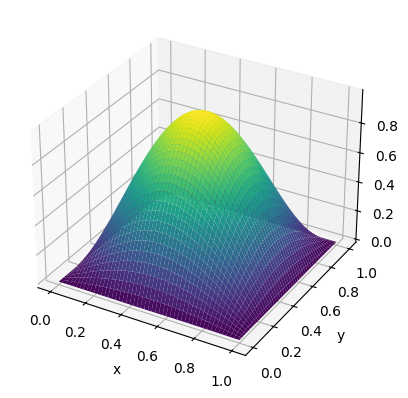

In [1]:
# Want to solve the Poisson equation u_xx+u_yy=-2*(pi^2)*sin(2*pi*x)*sin(2*pi*y) in the domain [0,1]x[0,1] with Dirichlet boundary conditions
# u(x,0)=u(x,1)=u(0,y)=u(1,y)=0
#We know that the solution of the above Poisson equation is u(x,y)=sin(pi*x)*sin(pi*y)
#Our PINN model will have 2 input nodes( x,y) , 3 hidden layer with 30 neurons each and 1 output node
# Let say I got N_u as the predicted u , and (x_i,y_i) as the N input points, then the loss function will be summation (i=1 to N ) (N_u_xx+N_u_yy+2*(pi^2)*sin(pi*x_i)*sin(pi*y_i))^2 + summation (i=1 to N) (N_u(x_i,y_i)-u(x_i,y_i))^2
# Now let's implement the PINN model

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

#device configuration
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Define the PINN model

class PINN(nn.Module):
    def __init__(self,n_input,n_output,n_hidden):
        super(PINN,self).__init__()
        self.linear1=nn.Linear(n_input,n_hidden)
        self.linear2=nn.Linear(n_hidden,n_hidden)
        self.linear3=nn.Linear(n_hidden,n_hidden)
        self.linear4=nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=torch.tanh(self.linear1(x))
        x=torch.tanh(self.linear2(x))
        x=torch.tanh(self.linear3(x))
        x=self.linear4(x)
        return x

#Define the Poisson equation
def u(x,y):
    return torch.sin(np.pi*x)*torch.sin(np.pi*y)
def f(x,y):
    return -2*(np.pi**2)*torch.sin(np.pi*x)*torch.sin(np.pi*y)
def pde_loss(model,x,y):
    #compute the gradients
    x.requires_grad=True
    y.requires_grad=True
    u_pred=model(torch.cat((x,y),1))
    u_x=torch.autograd.grad(u_pred,x,grad_outputs=torch.ones_like(u_pred),create_graph=True)[0]
    u_xx=torch.autograd.grad(u_x,x,grad_outputs=torch.ones_like(u_x),create_graph=True)[0]
    u_y=torch.autograd.grad(u_pred,y,grad_outputs=torch.ones_like(u_pred),create_graph=True)[0]
    u_yy=torch.autograd.grad(u_y,y,grad_outputs=torch.ones_like(u_y),create_graph=True)[0]
    f_pred=u_xx+u_yy
    return ((f_pred-f(x,y))**2).mean()# Loss in inner points.Residual
def boundary_loss(model,x,y):#x,y 's are only from {0,1} i.e. boundary points
    u_pred=model(torch.cat((x,y),1))
    return ((u_pred-u(x,y))**2).mean()#Loss due to BCs

#Prepare the data
N_b=1000
N_f=10000
x_b=torch.randint(0, 2, (N_b, 1)).float().to(device)#Generate N_b numbers of boundary points with x=0,1
x_u=torch.rand(N_b,1).to(device)
y_b=torch.randint(0, 2, (N_b, 1)).float().to(device)# Generate N_b number of boundary points with y=0,1
y_u=torch.rand(N_b,1).to(device)
x_f=torch.rand(N_f,1).to(device)
y_f=torch.rand(N_f,1).to(device)

#Prepare the model
model=PINN(2,1,30).to(device)

#Loss and optimizer
optimizer=optim.Adam(model.parameters(),lr=0.001)

#Training loop
num_epochs=30000
for epoch in range(num_epochs):
    #forward pass and loss
    loss=pde_loss(model,x_f,y_f)+ 1000*boundary_loss(model,x_b,y_u)+1000*boundary_loss(model,x_u,y_b)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update
    optimizer.step()

    if (epoch+1)%1000==0:
        print(f'epoch: {epoch+1}, loss={loss.item()}')

#Plot
x=torch.linspace(0,1,100)
y=torch.linspace(0,1,100)
X,Y=torch.meshgrid(x,y)
u_pred=model(torch.cat((X.reshape(-1,1),Y.reshape(-1,1)),1).to(device)).reshape(100,100).cpu().detach().numpy()
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,u_pred,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

#The above code is the implementation of the Poisson equation using the PINN model





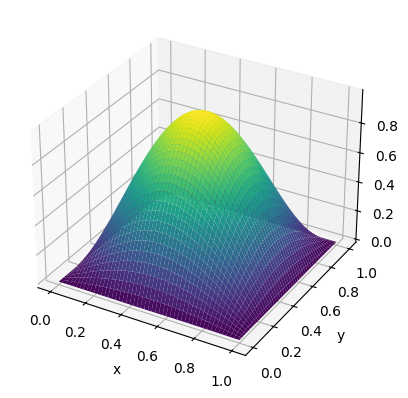

In [2]:
#Plot
x=torch.linspace(0,1,100)
y=torch.linspace(0,1,100)
X,Y=torch.meshgrid(x,y)
u_pred=model(torch.cat((X.reshape(-1,1),Y.reshape(-1,1)),1).to(device)).reshape(100,100).cpu().detach().numpy()
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,u_pred,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.savefig('PINNPOISSON2DPRED.png')
plt.show()

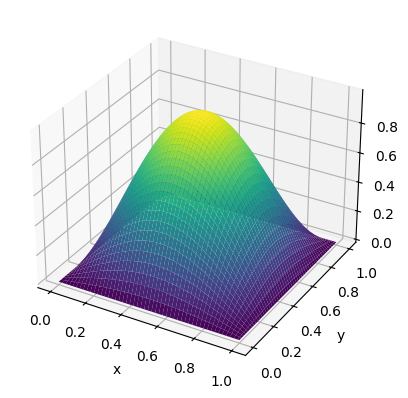

In [4]:
#Let's plot the u(x,y)=sin(pi*x)*sin(pi*y) on [0,1]*[0,1] domain to see whather my predicted u is matching with actual u or not
x=torch.linspace(0,1,100)
y=torch.linspace(0,1,100)
X,Y=torch.meshgrid(x,y)
u_actual=torch.sin(np.pi*X)*torch.sin(np.pi*Y)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,u_actual,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.savefig('PINNPOISSON2DACTUAL.png')
plt.show()

## Let sample $10000000 \times 10000000$ points from $[0,1]\times[0,1]$, and find the L1 norm of (u_pred-u_actual) 

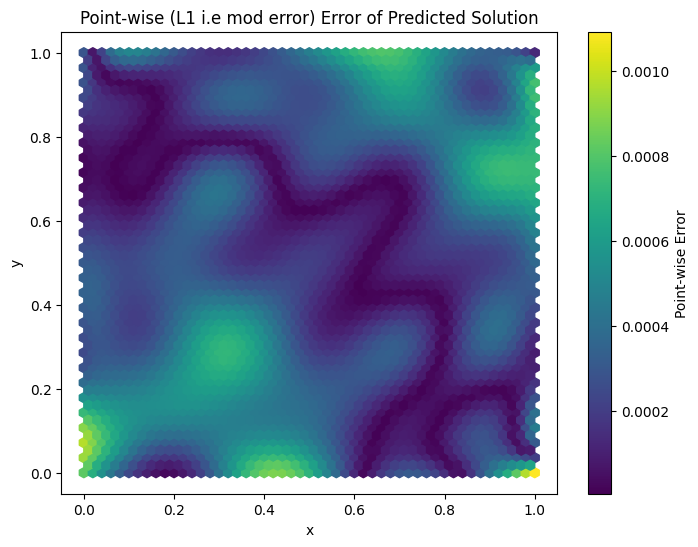

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random test points
N_test = 10000000
x_test = np.random.rand(N_test)
y_test = np.random.rand(N_test)

# Compute predicted values of u from the trained model
x_test_tensor = torch.tensor(x_test.reshape(-1, 1), dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32).to(device)
u_pred_tensor = model(torch.cat((x_test_tensor, y_test_tensor), 1)).cpu().detach().numpy()

# Compute true values of u
u_true = u(x_test_tensor, y_test_tensor).cpu().detach().numpy()

# Calculate point-wise error
error = np.abs(u_pred_tensor - u_true)

# Plot heatmap of point-wise error
plt.figure(figsize=(8, 6))
plt.hexbin(x_test, y_test, C=error.reshape(-1), gridsize=50, cmap='viridis', reduce_C_function=np.mean)
plt.colorbar(label='Point-wise Error')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point-wise (L1 i.e mod error) Error of Predicted Solution')
plt.savefig('PINNRESIDUALPOISSON2D.png')
plt.show()

In [6]:
print(error.mean())

0.0002867316


## L1 Norm error is low .Good!!